In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Functions

In [25]:
def convert_to_percentage(value):
    return value / 255

In [28]:
def recommend_product_index(v_target, v_products):
    calc = np.array(np.round(np.abs(v_target - v_products), 2))
    nearest_value = np.min(calc)
    index = np.where(calc == nearest_value)[0][0]
    return index

## Data Exploration Analysis

### Foundation Data

In [2]:
df_foundation = pd.read_csv('datasets/foundation/allShades_new.csv')
df_foundation.head()

brand              product  \
0  Anastasia Beverly Hills  Luminous Foundation   
1  Anastasia Beverly Hills  Luminous Foundation   
2  Anastasia Beverly Hills  Luminous Foundation   
3  Anastasia Beverly Hills  Luminous Foundation   
4  Anastasia Beverly Hills  Luminous Foundation   

                                                 url  \
0  https://www.ulta.com/luminous-foundation?produ...   
1  https://www.ulta.com/luminous-foundation?produ...   
2  https://www.ulta.com/luminous-foundation?produ...   
3  https://www.ulta.com/luminous-foundation?produ...   
4  https://www.ulta.com/luminous-foundation?produ...   

                                         description  \
0  355N (medium skin with a neutral golden undert...   
1     100N (very fair skin with a neutral undertone)   
2        110C (very fair skin with a cool undertone)   
3        120W (very fair skin with a warm undertone)   
4  130N (very fair skin with a neutral pink under...   

                                              imgSrc  \
0  https://images.ulta.com/is/image/Ulta/2551437s...   
1  https://images.ulta.com/is/image/Ulta/2551414s...   
2  https://images.ulta.com/is/image/Ulta/2551412s...   
3  https://images.ulta.com/is/image/Ulta/2551419s...   
4  https://images.ulta.com/is/image/Ulta/2551416s...   

                                              imgAlt name specific colorspace  \
0  355N (medium skin with a neutral golden undert...  NaN     355N        RGB   
1     100N (very fair skin with a neutral undertone)  NaN     100N        RGB   
2        110C (very fair skin with a cool undertone)  NaN     110C        RGB   
3        120W (very fair skin with a warm undertone)  NaN     120W        RGB   
4  130N (very fair skin with a neutral pink under...  NaN     130N        RGB   

       hex  Hue  Saturation     Value  
0  #A06F4A   18         137  0.627451  
1  #F1E7DB   23          23  0.945098  
2  #F0E7DB   24          22  0.941176  
3  #EFD0AE   22          69  0.937255  
4  #D5C1AA   22          51  0.835294

In [3]:
df_foundation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        6816 non-null   object 
 1   product      6816 non-null   object 
 2   url          6816 non-null   object 
 3   description  6816 non-null   object 
 4   imgSrc       6816 non-null   object 
 5   imgAlt       6816 non-null   object 
 6   name         4955 non-null   object 
 7   specific     4905 non-null   object 
 8   colorspace   6816 non-null   object 
 9   hex          6816 non-null   object 
 10  Hue          6816 non-null   int64  
 11  Saturation   6816 non-null   int64  
 12  Value        6816 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 692.4+ KB


In [4]:
df_foundation.describe()

Hue   Saturation        Value
count  6816.000000  6816.000000  6816.000000
mean     17.120012   103.953052     0.788464
std       4.292289    35.848927     0.157067
min       0.000000     0.000000     0.184314
25%      15.000000    79.000000     0.694118
50%      17.000000   102.000000     0.831373
75%      20.000000   128.000000     0.905882
max     163.000000   230.000000     1.000000

In [5]:
total_brands = len(df_foundation['brand'].unique())
print(f"There are totals {total_brands} brands in the dataset")

There are totals 107 brands in the dataset


In [6]:
df_foundation['brand'].value_counts()

brand
bareMinerals                 370
Tarte                        242
Clinique                     232
SEPHORA COLLECTION           229
MAC                          185
                            ... 
COOLA                          3
Marc Jacobs Beauty             3
Dr. Dennis Gross Skincare      2
KIKO Milano                    2
Black Up                       1
Name: count, Length: 107, dtype: int64

In [20]:
print(df_foundation.isnull().sum())

brand             0
product           0
url               0
description       0
imgSrc            0
imgAlt            0
name           1861
specific       1911
colorspace        0
hex               0
Hue               0
Saturation        0
Value             0
dtype: int64


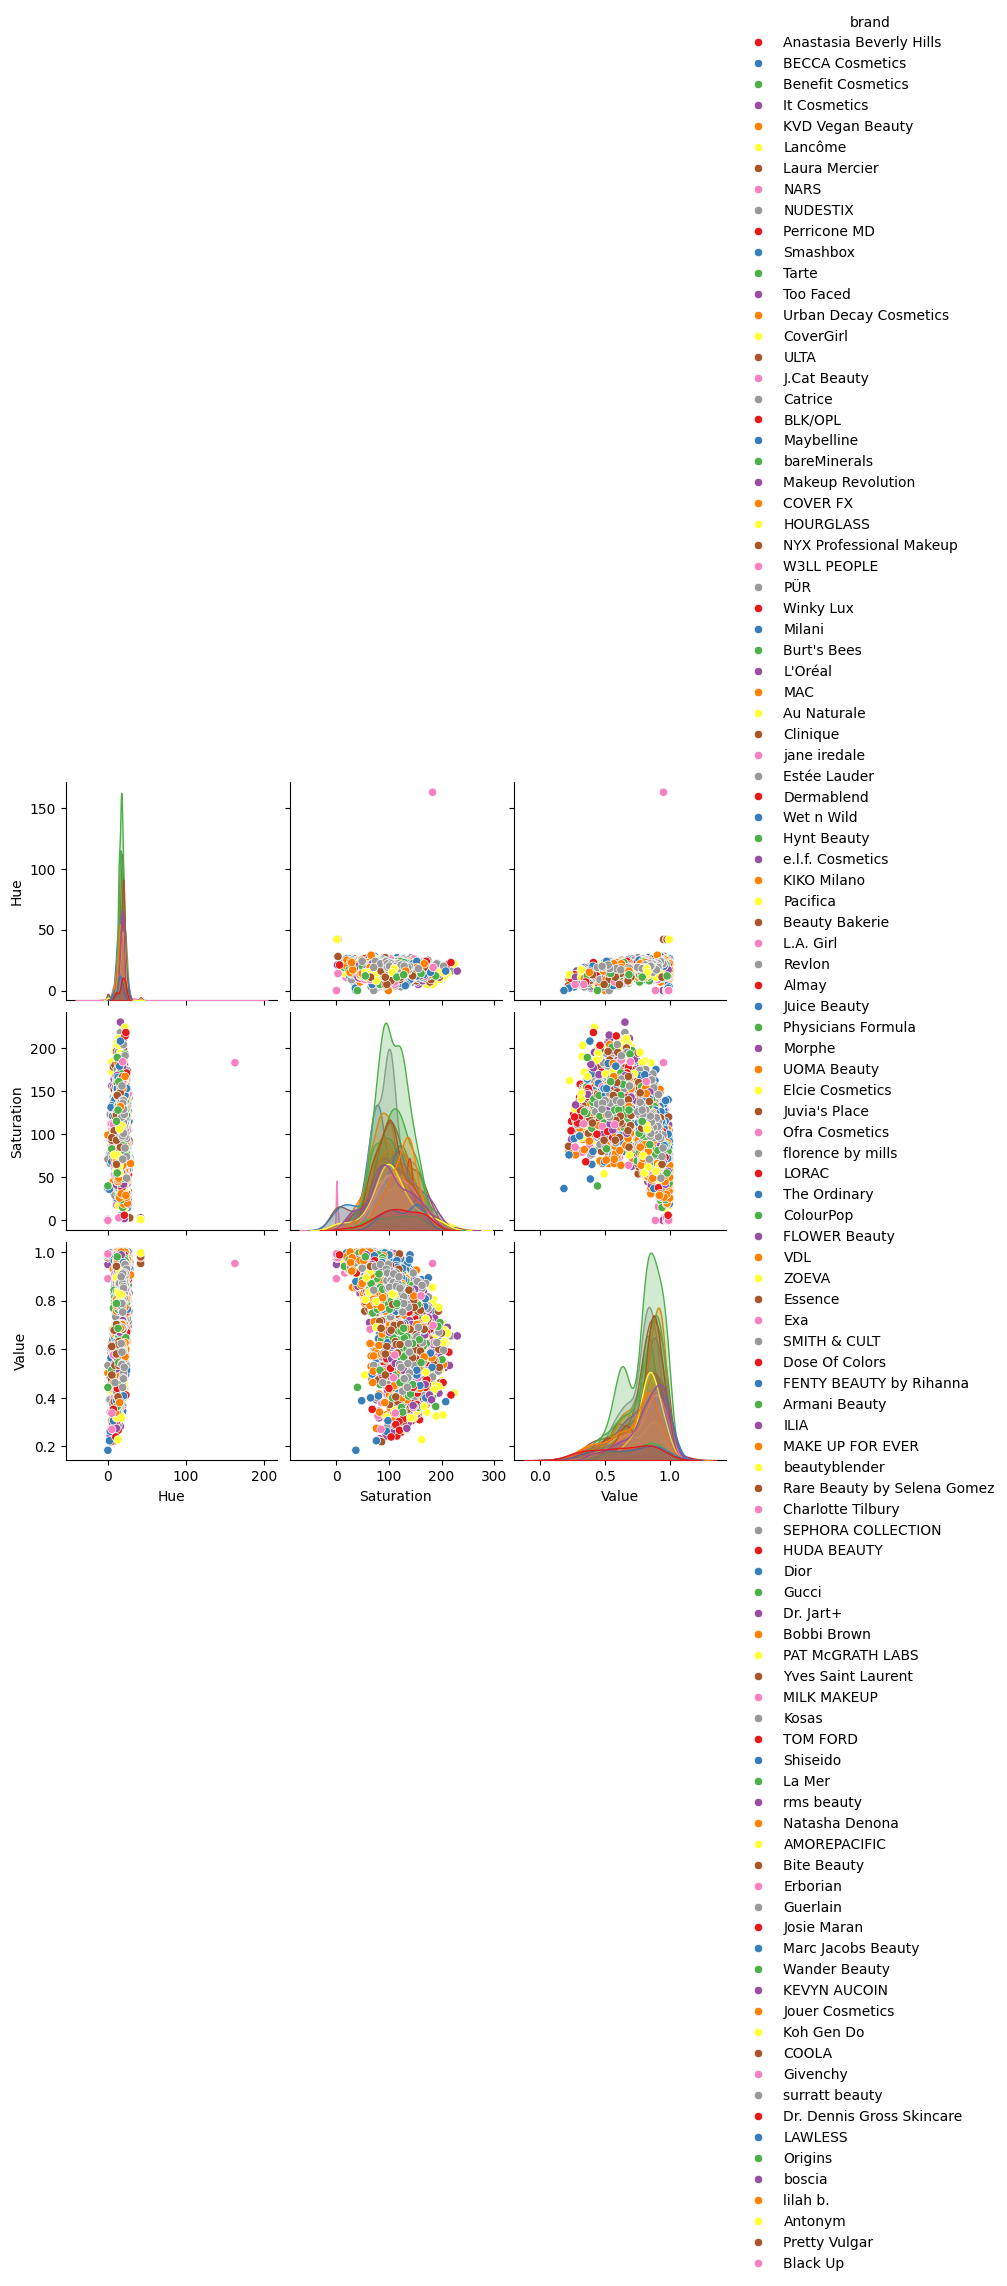

In [27]:
pair = sns.pairplot(df_foundation, hue='brand', palette='Set1')

### W3LL Brand Data

In [9]:
df_well = df_foundation[df_foundation['brand'] == 'W3LL PEOPLE']
df_well.head()

brand                      product  \
953  W3LL PEOPLE  Bio Base Pressed Foundation   
954  W3LL PEOPLE  Bio Base Pressed Foundation   
955  W3LL PEOPLE  Bio Base Pressed Foundation   
956  W3LL PEOPLE  Bio Base Pressed Foundation   
957  W3LL PEOPLE  Bio Base Pressed Foundation   

                                                   url  \
953  https://www.ulta.com/bio-base-pressed-foundati...   
954  https://www.ulta.com/bio-base-pressed-foundati...   
955  https://www.ulta.com/bio-base-pressed-foundati...   
956  https://www.ulta.com/bio-base-pressed-foundati...   
957  https://www.ulta.com/bio-base-pressed-foundati...   

                                           description  \
953  Fair Golden (fair skin w/ neutral or golden un...   
954  Fair Pink (fair skin w/ neutral or pink undert...   
955   Medium Golden (medium skin w/ golden undertones)   
956  Medium Neutral (medium skin w/ neutral underto...   
957  Dark Neutral (medium dark skin w/ neutral unde...   

                                                imgSrc  \
953  https://images.ulta.com/is/image/Ulta/2553261s...   
954  https://images.ulta.com/is/image/Ulta/2553259s...   
955  https://images.ulta.com/is/image/Ulta/2553296s...   
956  https://images.ulta.com/is/image/Ulta/2553262s...   
957  https://images.ulta.com/is/image/Ulta/2553265s...   

                                                imgAlt            name  \
953  Fair Golden (fair skin w/ neutral or golden un...     Fair Golden   
954  Fair Pink (fair skin w/ neutral or pink undert...       Fair Pink   
955   Medium Golden (medium skin w/ golden undertones)   Medium Golden   
956  Medium Neutral (medium skin w/ neutral underto...  Medium Neutral   
957  Dark Neutral (medium dark skin w/ neutral unde...    Dark Neutral   

    specific colorspace      hex  Hue  Saturation     Value  
953      NaN        RGB  #F1E0DA   11          24  0.945098  
954      NaN        RGB  #F7EAE5   11          18  0.968627  
955      NaN        RGB  #F8E2D7   14          33  0.972549  
956      NaN        RGB  #F3DCD3   11          33  0.952941  
957      NaN        RGB  #EFC9B7   13          59  0.937255

In [10]:
df_well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 953 to 1396
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        14 non-null     object 
 1   product      14 non-null     object 
 2   url          14 non-null     object 
 3   description  14 non-null     object 
 4   imgSrc       14 non-null     object 
 5   imgAlt       14 non-null     object 
 6   name         14 non-null     object 
 7   specific     0 non-null      object 
 8   colorspace   14 non-null     object 
 9   hex          14 non-null     object 
 10  Hue          14 non-null     int64  
 11  Saturation   14 non-null     int64  
 12  Value        14 non-null     float64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ KB


In [11]:
well_count = df_well['product'].unique().size
print(f"There are {well_count} products of Maybelline foundation")

There are 2 products of Maybelline foundation


In [12]:
well_unique = df_well['product'].unique()
for i, product in enumerate(well_unique):
    print(f"{i+1}. {product}")

1. Bio Base Pressed Foundation
2. Narcissist Foundation Stick


In [13]:
print(df_well.isnull().sum())

brand           0
product         0
url             0
description     0
imgSrc          0
imgAlt          0
name            0
specific       14
colorspace      0
hex             0
Hue             0
Saturation      0
Value           0
dtype: int64


In [14]:
index = df_well[df_well['specific'].isnull()].index
pd.DataFrame(df_well.loc[index])

brand                      product  \
953   W3LL PEOPLE  Bio Base Pressed Foundation   
954   W3LL PEOPLE  Bio Base Pressed Foundation   
955   W3LL PEOPLE  Bio Base Pressed Foundation   
956   W3LL PEOPLE  Bio Base Pressed Foundation   
957   W3LL PEOPLE  Bio Base Pressed Foundation   
958   W3LL PEOPLE  Bio Base Pressed Foundation   
1389  W3LL PEOPLE  Narcissist Foundation Stick   
1390  W3LL PEOPLE  Narcissist Foundation Stick   
1391  W3LL PEOPLE  Narcissist Foundation Stick   
1392  W3LL PEOPLE  Narcissist Foundation Stick   
1393  W3LL PEOPLE  Narcissist Foundation Stick   
1394  W3LL PEOPLE  Narcissist Foundation Stick   
1395  W3LL PEOPLE  Narcissist Foundation Stick   
1396  W3LL PEOPLE  Narcissist Foundation Stick   

                                                    url  \
953   https://www.ulta.com/bio-base-pressed-foundati...   
954   https://www.ulta.com/bio-base-pressed-foundati...   
955   https://www.ulta.com/bio-base-pressed-foundati...   
956   https://www.ulta.com/bio-base-pressed-foundati...   
957   https://www.ulta.com/bio-base-pressed-foundati...   
958   https://www.ulta.com/bio-base-pressed-foundati...   
1389  https://www.ulta.com/narcissist-foundation-sti...   
1390  https://www.ulta.com/narcissist-foundation-sti...   
1391  https://www.ulta.com/narcissist-foundation-sti...   
1392  https://www.ulta.com/narcissist-foundation-sti...   
1393  https://www.ulta.com/narcissist-foundation-sti...   
1394  https://www.ulta.com/narcissist-foundation-sti...   
1395  https://www.ulta.com/narcissist-foundation-sti...   
1396  https://www.ulta.com/narcissist-foundation-sti...   

                                            description  \
953   Fair Golden (fair skin w/ neutral or golden un...   
954   Fair Pink (fair skin w/ neutral or pink undert...   
955    Medium Golden (medium skin w/ golden undertones)   
956   Medium Neutral (medium skin w/ neutral underto...   
957   Dark Neutral (medium dark skin w/ neutral unde...   
958                Tan (tan skin w/ neutral undertones)   
1389  Pale Ivory (fair skin w/ neutral or golden und...   
1390  Fair Pink (fair skin w/ neutral or pink undert...   
1391  Fair Golden (fair skin w/ neutral or golden un...   
1392  Medium Neutral (medium skin w/ golden or neutr...   
1393  Medium Pink (medium skin w/ neutral or pink un...   
1394       Dark Golden (dark skin w/ golden undertones)   
1395     Dark Neutral (dark skin w/ neutral undertones)   
1396         Rich Mocha (dark skin w/ mocha undertones)   

                                                 imgSrc  \
953   https://images.ulta.com/is/image/Ulta/2553261s...   
954   https://images.ulta.com/is/image/Ulta/2553259s...   
955   https://images.ulta.com/is/image/Ulta/2553296s...   
956   https://images.ulta.com/is/image/Ulta/2553262s...   
957   https://images.ulta.com/is/image/Ulta/2553265s...   
958   https://images.ulta.com/is/image/Ulta/2553264s...   
1389  https://images.ulta.com/is/image/Ulta/2553266s...   
1390  https://images.ulta.com/is/image/Ulta/2553269s...   
1391  https://images.ulta.com/is/image/Ulta/2553267s...   
1392  https://images.ulta.com/is/image/Ulta/2553276s...   
1393  https://images.ulta.com/is/image/Ulta/2553274s...   
1394  https://images.ulta.com/is/image/Ulta/2553280s...   
1395  https://images.ulta.com/is/image/Ulta/2553277s...   
1396  https://images.ulta.com/is/image/Ulta/2553275s...   

                                                 imgAlt            name  \
953   Fair Golden (fair skin w/ neutral or golden un...     Fair Golden   
954   Fair Pink (fair skin w/ neutral or pink undert...       Fair Pink   
955    Medium Golden (medium skin w/ golden undertones)   Medium Golden   
956   Medium Neutral (medium skin w/ neutral underto...  Medium Neutral   
957   Dark Neutral (medium dark skin w/ neutral unde...    Dark Neutral   
958                Tan (tan skin w/ neutral undertones)             Tan   
1389  Pale Ivory (fair skin w/ neutral or golden und...      Pale Ivory   
139

In [15]:
df_well[df_well['specific'].isnull()]['product'].unique()

array(['Bio Base Pressed Foundation', 'Narcissist Foundation Stick'],
      dtype=object)

## Data Cleaning

From the previous data exploration, I have a clear information about the data. Turns out it has a missing value in the 'specific' column. Because 'specific' column wasn't too important, so I decided to drop it.

In [16]:
df_well.drop(columns=['specific'], inplace=True)

/var/folders/sz/q7hsr2ks7kv5x7t0w0mrdr0w0000gn/T/ipykernel_72779/2022106308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well.drop(columns=['specific'], inplace=True)


In [17]:
df_well.columns

Index(['brand', 'product', 'url', 'description', 'imgSrc', 'imgAlt', 'name',
       'colorspace', 'hex', 'Hue', 'Saturation', 'Value'],
      dtype='object')

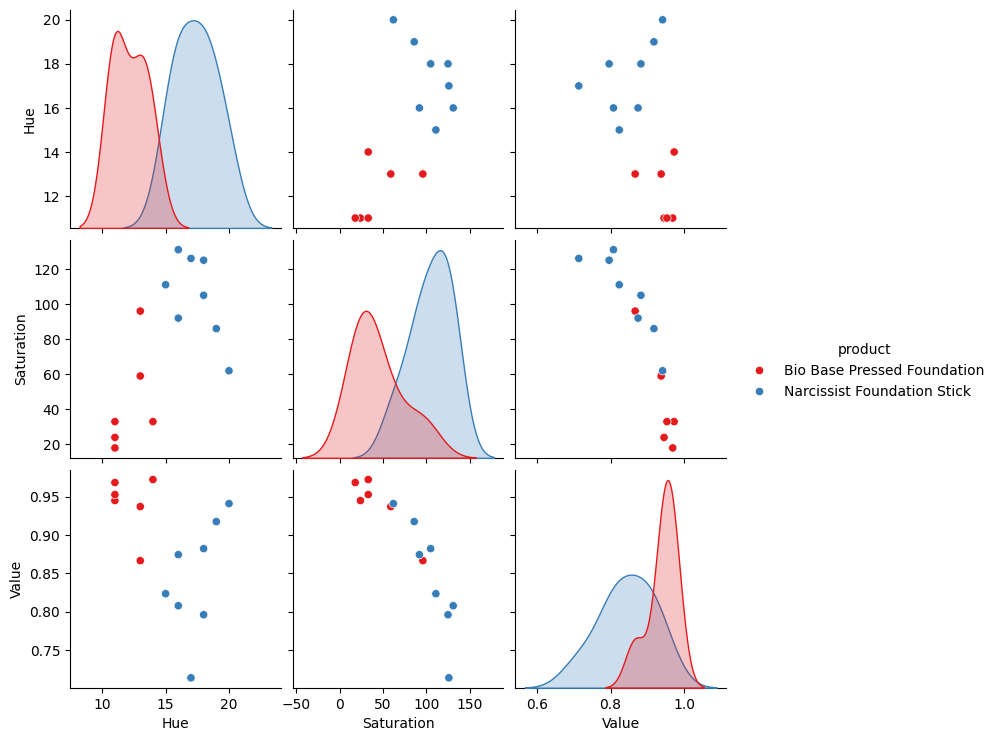

In [18]:
pair = sns.pairplot(df_well, hue='product', palette='Set1')

In [19]:
df_well.to_csv('datasets/foundation/w3ll_people.csv', index=False)

In [21]:
df_well = pd.read_csv('datasets/foundation/w3ll_people.csv')

In [22]:
df_well.head()

brand                      product  \
0  W3LL PEOPLE  Bio Base Pressed Foundation   
1  W3LL PEOPLE  Bio Base Pressed Foundation   
2  W3LL PEOPLE  Bio Base Pressed Foundation   
3  W3LL PEOPLE  Bio Base Pressed Foundation   
4  W3LL PEOPLE  Bio Base Pressed Foundation   

                                                 url  \
0  https://www.ulta.com/bio-base-pressed-foundati...   
1  https://www.ulta.com/bio-base-pressed-foundati...   
2  https://www.ulta.com/bio-base-pressed-foundati...   
3  https://www.ulta.com/bio-base-pressed-foundati...   
4  https://www.ulta.com/bio-base-pressed-foundati...   

                                         description  \
0  Fair Golden (fair skin w/ neutral or golden un...   
1  Fair Pink (fair skin w/ neutral or pink undert...   
2   Medium Golden (medium skin w/ golden undertones)   
3  Medium Neutral (medium skin w/ neutral underto...   
4  Dark Neutral (medium dark skin w/ neutral unde...   

                                              imgSrc  \
0  https://images.ulta.com/is/image/Ulta/2553261s...   
1  https://images.ulta.com/is/image/Ulta/2553259s...   
2  https://images.ulta.com/is/image/Ulta/2553296s...   
3  https://images.ulta.com/is/image/Ulta/2553262s...   
4  https://images.ulta.com/is/image/Ulta/2553265s...   

                                              imgAlt            name  \
0  Fair Golden (fair skin w/ neutral or golden un...     Fair Golden   
1  Fair Pink (fair skin w/ neutral or pink undert...       Fair Pink   
2   Medium Golden (medium skin w/ golden undertones)   Medium Golden   
3  Medium Neutral (medium skin w/ neutral underto...  Medium Neutral   
4  Dark Neutral (medium dark skin w/ neutral unde...    Dark Neutral   

  colorspace      hex  Hue  Saturation     Value  
0        RGB  #F1E0DA   11          24  0.945098  
1        RGB  #F7EAE5   11          18  0.968627  
2        RGB  #F8E2D7   14          33  0.972549  
3        RGB  #F3DCD3   11          33  0.952941  
4        RGB  #EFC9B7   13          59  0.937255

# Fitzpatrick Skin Type Image

I performed the same steps as the GAN Images. The only difference is I didn't use SMOTE and Random Undersampling because the data is already balanced.

In [23]:
df_image_fitzpatrick = pd.read_csv('datasets/fitzpatrick/merged_data.csv')
df_image_fitzpatrick.head()

file    age  gender            race phototype  hsv_mean_h  hsv_mean_s  \
0      1.jpg  50-59    Male      East Asian       III   19.829241  137.944695   
1     10.jpg  30-39    Male  Middle Eastern         V   46.377611   66.848653   
2    100.jpg  20-29  Female      East Asian       III   18.022879   77.726981   
3   1000.jpg  30-39    Male           White    I & II  160.481166   85.828245   
4  10004.jpg  40-49    Male          Indian         V   12.648039  101.791016   

   hsv_mean_v  hsl_mean_h  hsl_mean_s  ...  hsv_median_v  hsl_median_h  \
0   59.733877   19.805764   43.699139  ...          59.0          11.0   
1  182.818818   46.495516  159.473434  ...         190.0           4.0   
2  227.602320   19.009347  193.497987  ...         231.0           7.0   
3  118.044105  160.467235   98.868762  ...         103.0         173.0   
4  141.452208   12.642140  113.252232  ...         139.0          12.0   

   hsl_median_s  hsl_median_l  hsv_mode_h  hsv_mode_s  hsv_mode_v  hsl_mode_h  \
0          43.0          94.0           8         125          60          13   
1         165.0          74.0           2          63         208           2   
2         196.0         150.0           7          68         239           7   
3          84.0          56.0         174          90          94         174   
4         110.0          67.0          12         102         136          12   

   hsl_mode_s  hsl_mode_l  
0          42          85  
1         184          77  
2         207         117  
3          76          55  
4         100          65  

[5 rows x 23 columns]

In [ ]:
df_image_fitzpatrick["hsv_mean_v_percentage"] = df_image_fitzpatrick["hsv_mean_v"].apply(convert_to_percentage)

In [30]:
df_image_fitzpatrick

file    age  gender            race phototype  hsv_mean_h  \
0          1.jpg  50-59    Male      East Asian       III   19.829241   
1         10.jpg  30-39    Male  Middle Eastern         V   46.377611   
2        100.jpg  20-29  Female      East Asian       III   18.022879   
3       1000.jpg  30-39    Male           White    I & II  160.481166   
4      10004.jpg  40-49    Male          Indian         V   12.648039   
...          ...    ...     ...             ...       ...         ...   
39934   9476.jpg  30-39  Female           Black        VI   13.470643   
39935   9501.jpg  40-49  Female           Black        VI   20.292730   
39936   9560.jpg  30-39  Female           Black        VI    6.820392   
39937   9561.jpg  20-29  Female           Black        VI    9.870436   
39938   9578.jpg  20-29  Female           Black        VI    9.703823   

       hsv_mean_s  hsv_mean_v  hsl_mean_h  hsl_mean_s  ...  hsl_median_h  \
0      137.944695   59.733877   19.805764   43.699139  ...          11.0   
1       66.848653  182.818818   46.495516  159.473434  ...           4.0   
2       77.726981  227.602320   19.009347  193.497987  ...           7.0   
3       85.828245  118.044105  160.467235   98.868762  ...         173.0   
4      101.791016  141.452208   12.642140  113.252232  ...          12.0   
...           ...         ...         ...         ...  ...           ...   
39934  147.794364  128.370994   13.464066   91.496672  ...           8.0   
39935  108.283861  131.563835   20.354831  105.746193  ...           7.0   
39936  188.809431   53.937221    6.838867   34.513811  ...           7.0   
39937  177.025849   97.407346    9.860112   64.856744  ...          10.0   
39938  158.816885  141.539222    9.693240   98.971759  ...          11.0   

       hsl_median_s  hsl_median_l  hsv_mode_h  hsv_mode_s  hsv_mode_v  \
0              43.0          94.0           8         125          60   
1             165.0          74.0           2          63         208   
2             196.0         150.0           7          68         239   
3              84.0          56.0         174          90          94   
4             110.0          67.0          12         102         136   
...             ...           ...         ...         ...         ...   
39934          86.0         110.0           6         169         123   
39935         115.0          68.0           7         102         156   
39936          34.0         148.0           6         170          54   
39937          66.0         134.0          10         165         102   
39938          88.0         129.0          13         163          80   

       hsl_mode_h  hsl_mode_s  hsl_mode_l  hsv_mean_v_percentage  
0              13          42          85               0.234250  
1               2         184          77               0.716937  
2               7         207         117               0.892558  
3             174          76          55               0.462918  
4              12         100          65               0.554715  
...           ...         ...         ...                    ...  
39934           6          84         128               0.503416  
39935           7         122          63               0.515937  
39936           6          34         153               0.211519  
39937          10          70         122               0.381990  
39938          13          57         125               0.555056  

[39939 rows x 24 columns]

In [31]:
df_image_fitzpatrick.to_csv("datasets/fitzpatrick/merged_data_new.csv", index=False)

In [26]:
df_image_fitzpatrick = pd.read_csv('datasets/fitzpatrick/merged_data_new.csv')

In [29]:
recommended_product_index_fitzpatrick = np.array(
    df_image_fitzpatrick.apply(
        lambda x: recommend_product_index(
            x["hsv_mean_v_percentage"], df_well["Value"].values
        ),
        axis=1,
    )
)

In [30]:
recommended_product_index_fitzpatrick = pd.DataFrame(
    recommended_product_index_fitzpatrick, columns=["recommended_product_index"]
)

In [31]:
recommended_product_index_fitzpatrick

recommended_product_index
0                              5
1                              5
2                              5
3                              5
4                              5
...                          ...
39934                          5
39935                          5
39936                          5
39937                          5
39938                          5

[39939 rows x 1 columns]

In [35]:
product_fitzpatrick = np.array(
    [
        df_well["imgAlt"][index]
        for index in recommended_product_index_fitzpatrick["recommended_product_index"]
    ]
)
product_fitzpatrick

array(['Tan (tan skin w/ neutral undertones)',
       'Tan (tan skin w/ neutral undertones)',
       'Tan (tan skin w/ neutral undertones)', ...,
       'Tan (tan skin w/ neutral undertones)',
       'Tan (tan skin w/ neutral undertones)',
       'Tan (tan skin w/ neutral undertones)'], dtype='<U55')

In [38]:
v_val_fitzpatrick = np.array(
    [
        df_well["Value"][index]
        for index in recommended_product_index_fitzpatrick["recommended_product_index"]
    ]
)
v_val_fitzpatrick

array([0.86666667, 0.86666667, 0.86666667, ..., 0.86666667, 0.86666667,
       0.86666667])

In [39]:
df_recommendation_fitzpatrick = pd.DataFrame([product_fitzpatrick, v_val_fitzpatrick]).T

In [40]:
df_recommendation_fitzpatrick.columns = ["product", "Value"]

In [41]:
df_recommendation_fitzpatrick

product     Value
0      Tan (tan skin w/ neutral undertones)  0.866667
1      Tan (tan skin w/ neutral undertones)  0.866667
2      Tan (tan skin w/ neutral undertones)  0.866667
3      Tan (tan skin w/ neutral undertones)  0.866667
4      Tan (tan skin w/ neutral undertones)  0.866667
...                                     ...       ...
39934  Tan (tan skin w/ neutral undertones)  0.866667
39935  Tan (tan skin w/ neutral undertones)  0.866667
39936  Tan (tan skin w/ neutral undertones)  0.866667
39937  Tan (tan skin w/ neutral undertones)  0.866667
39938  Tan (tan skin w/ neutral undertones)  0.866667

[39939 rows x 2 columns]

In [42]:
merged_fitzpatrick = pd.concat([df_image_fitzpatrick, df_recommendation_fitzpatrick], axis=1)
merged_fitzpatrick.head()

file    age  gender            race phototype  hsv_mean_h  hsv_mean_s  \
0      1.jpg  50-59    Male      East Asian       III   19.829241  137.944695   
1     10.jpg  30-39    Male  Middle Eastern         V   46.377611   66.848653   
2    100.jpg  20-29  Female      East Asian       III   18.022879   77.726981   
3   1000.jpg  30-39    Male           White    I & II  160.481166   85.828245   
4  10004.jpg  40-49    Male          Indian         V   12.648039  101.791016   

   hsv_mean_v  hsl_mean_h  hsl_mean_s  ...  hsl_median_l  hsv_mode_h  \
0   59.733877   19.805764   43.699139  ...          94.0           8   
1  182.818818   46.495516  159.473434  ...          74.0           2   
2  227.602320   19.009347  193.497987  ...         150.0           7   
3  118.044105  160.467235   98.868762  ...          56.0         174   
4  141.452208   12.642140  113.252232  ...          67.0          12   

   hsv_mode_s  hsv_mode_v  hsl_mode_h  hsl_mode_s  hsl_mode_l  \
0         125          60          13          42          85   
1          63         208           2         184          77   
2          68         239           7         207         117   
3          90          94         174          76          55   
4         102         136          12         100          65   

   hsv_mean_v_percentage                               product     Value  
0               0.234250  Tan (tan skin w/ neutral undertones)  0.866667  
1               0.716937  Tan (tan skin w/ neutral undertones)  0.866667  
2               0.892558  Tan (tan skin w/ neutral undertones)  0.866667  
3               0.462918  Tan (tan skin w/ neutral undertones)  0.866667  
4               0.554715  Tan (tan skin w/ neutral undertones)  0.866667  

[5 rows x 26 columns]

In [43]:
merged_fitzpatrick.to_csv('datasets/fitzpatrick/fitzpatrick_with_recommendation.csv', index=False)

In [269]:
df_image_fitzpatrick_new = pd.read_csv('datasets/fitzpatrick/fitzpatrick_with_recommendation.csv')
df_image_fitzpatrick_new.head()

file    age  gender            race phototype  hsv_mean_h  hsv_mean_s  \
0      1.jpg  50-59    Male      East Asian       III   19.829241  137.944695   
1     10.jpg  30-39    Male  Middle Eastern         V   46.377611   66.848653   
2    100.jpg  20-29  Female      East Asian       III   18.022879   77.726981   
3   1000.jpg  30-39    Male           White    I & II  160.481166   85.828245   
4  10004.jpg  40-49    Male          Indian         V   12.648039  101.791016   

   hsv_mean_v  hsl_mean_h  hsl_mean_s  ...  hsl_median_l  hsv_mode_h  \
0   59.733877   19.805764   43.699139  ...          94.0           8   
1  182.818818   46.495516  159.473434  ...          74.0           2   
2  227.602320   19.009347  193.497987  ...         150.0           7   
3  118.044105  160.467235   98.868762  ...          56.0         174   
4  141.452208   12.642140  113.252232  ...          67.0          12   

   hsv_mode_s  hsv_mode_v  hsl_mode_h  hsl_mode_s  hsl_mode_l  \
0         125          60          13          42          85   
1          63         208           2         184          77   
2          68         239           7         207         117   
3          90          94         174          76          55   
4         102         136          12         100          65   

   hsv_mean_v_percentage                               product     Value  
0               0.234250  Tan (tan skin w/ neutral undertones)  0.866667  
1               0.716937  Tan (tan skin w/ neutral undertones)  0.866667  
2               0.892558  Tan (tan skin w/ neutral undertones)  0.866667  
3               0.462918  Tan (tan skin w/ neutral undertones)  0.866667  
4               0.554715  Tan (tan skin w/ neutral undertones)  0.866667  

[5 rows x 26 columns]

# Using only 150 datas from each product class

Because the class is imbalanced, I decided to use only 150 datas from each product class.

In [270]:
df_image_fitzpatrick_new.get("product").unique()

array(['Tan (tan skin w/ neutral undertones)',
       'Dark Neutral (medium dark skin w/ neutral undertones)',
       'Fair Golden (fair skin w/ neutral or golden undertones)',
       'Fair Pink (fair skin w/ neutral or pink undertones)',
       'Medium Neutral (medium skin w/ neutral undertones)',
       'Medium Golden (medium skin w/ golden undertones)'], dtype=object)

In [271]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       38531
Dark Neutral (medium dark skin w/ neutral undertones)        634
Fair Golden (fair skin w/ neutral or golden undertones)      318
Fair Pink (fair skin w/ neutral or pink undertones)          264
Medium Neutral (medium skin w/ neutral undertones)           115
Medium Golden (medium skin w/ golden undertones)              77
Name: count, dtype: int64

In [272]:
# keep only 150 samples of each product
df_image_fitzpatrick_new = df_image_fitzpatrick_new.groupby('product').head(150)

In [273]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       150
Dark Neutral (medium dark skin w/ neutral undertones)      150
Fair Golden (fair skin w/ neutral or golden undertones)    150
Fair Pink (fair skin w/ neutral or pink undertones)        150
Medium Neutral (medium skin w/ neutral undertones)         115
Medium Golden (medium skin w/ golden undertones)            77
Name: count, dtype: int64

In [274]:
le_fitzpatrick = LabelEncoder()
df_image_fitzpatrick_new['product'] = le_fitzpatrick.fit_transform(df_image_fitzpatrick_new['product'])
df_image_fitzpatrick_new['phototype'] = le_fitzpatrick.fit_transform(df_image_fitzpatrick_new['phototype'])

In [324]:
product_label = {
    0: "Dark Neutral (medium dark skin w/ neutral undertones)",
    1: "Fair Golden (fair skin w/ neutral or golden undertones)",
    2: "Fair Pink (fair skin w/ neutral or pink undertones",
    3: "Medium Golden (medium skin w/ golden undertones)",
    4: "Medium Neutral (medium skin w/ neutral undertones)",
    5: "Tan (tan skin w/ neutral undertones)"
}

In [275]:
df_image_fitzpatrick_new

file    age  gender             race  phototype  hsv_mean_h  \
0          1.jpg  50-59    Male       East Asian          1   19.829241   
1         10.jpg  30-39    Male   Middle Eastern          3   46.377611   
2        100.jpg  20-29  Female       East Asian          1   18.022879   
3       1000.jpg  30-39    Male            White          0  160.481166   
4      10004.jpg  40-49    Male           Indian          3   12.648039   
...          ...    ...     ...              ...        ...         ...   
39527   7090.jpg  20-29  Female       East Asian          1   10.072724   
39569   7219.jpg  20-29    Male       East Asian          1   31.709463   
39737   7661.jpg  20-29    Male  Latino_Hispanic          2   10.031230   
39747   7691.jpg  50-59    Male  Latino_Hispanic          2   13.260304   
39875   8529.jpg  20-29  Female       East Asian          1   10.117407   

       hsv_mean_s  hsv_mean_v  hsl_mean_h  hsl_mean_s  ...  hsl_median_l  \
0      137.944695   59.733877   19.805764   43.699139  ...          94.0   
1       66.848653  182.818818   46.495516  159.473434  ...          74.0   
2       77.726981  227.602320   19.009347  193.497987  ...         150.0   
3       85.828245  118.044105  160.467235   98.868762  ...          56.0   
4      101.791016  141.452208   12.642140  113.252232  ...          67.0   
...           ...         ...         ...         ...  ...           ...   
39527   80.685088  249.140366   10.070791  210.106684  ...         237.0   
39569   28.018595  248.950873   31.696528  236.602499  ...         198.0   
39737   88.949338  249.233578   10.025032  206.116450  ...         239.0   
39747   85.742805  242.853755   13.257314  202.545121  ...         221.0   
39875  107.552276  248.534658   10.111089  196.411591  ...         235.0   

       hsv_mode_h  hsv_mode_s  hsv_mode_v  hsl_mode_h  hsl_mode_s  hsl_mode_l  \
0               8         125          60          13          42          85   
1               2          63         208           2         184          77   
2               7          68         239           7         207         117   
3             174          90          94         174          76          55   
4              12         102         136          12         100          65   
...           ...         ...         ...         ...         ...         ...   
39527          10          74         255          10         217         255   
39569          30           0         255          30         254         255   
39737          10         102         255          10         202         255   
39747          14          86         255          14         211         255   
39875          10         109         253          10         198         255   

       hsv_mean_v_percentage  product     Value  
0                   0.234250        5  0.866667  
1                   0.716937        5  0.866667  
2                   0.892558        5  0.866667  
3                   0.462918        5  0.866667  
4                   0.554715        5  0.866667  
...                      ...      ...       ...  
39527               0.977021        3  0.972549  
39569               0.976278        3  0.972549  
39737               0.977387        3  0.972549  
39747               0.952368        4  0.952941  
39875               0.974646        3  0.972549  

[792 rows x 26 columns]

In [276]:
df_image_fitzpatrick_new.describe().T

count        mean        std        min         25%  \
phototype              792.0    1.430556   1.319014   0.000000    0.000000   
hsv_mean_h             792.0   19.151368  25.586683   2.904656    9.140964   
hsv_mean_s             792.0   95.104908  40.952441   4.981704   65.370735   
hsv_mean_v             792.0  224.448235  40.756428  31.671875  232.284768   
hsl_mean_h             792.0   19.381129  25.867258   2.903340    9.172488   
hsl_mean_s             792.0  184.282064  40.654453  26.381816  171.472397   
hsl_mean_l             792.0  184.384768  49.236893  30.585061  165.637875   
hsv_median_h           792.0   16.362374  29.607397   2.000000    8.000000   
hsv_median_s           792.0   94.020202  42.505085   2.000000   65.000000   
hsv_median_v           792.0  229.657197  42.453889  31.000000  239.000000   
hsl_median_h           792.0   16.497475  29.804759   2.000000    8.000000   
hsl_median_s           792.0  188.156566  42.626358  26.000000  176.750000   
hsl_median_l           792.0  190.241162  53.631385  24.000000  169.750000   
hsv_mode_h             792.0   16.054293  29.708203   0.000000    7.000000   
hsv_mode_s             792.0   91.595960  49.742837   0.000000   61.000000   
hsv_mode_v             792.0  234.210859  44.732917   3.000000  245.000000   
hsl_mode_h             792.0   16.294192  30.247743   0.000000    7.000000   
hsl_mode_s             792.0  192.727273  47.378711   4.000000  181.750000   
hsl_mode_l             792.0  216.878788  67.324228   0.000000  201.250000   
hsv_mean_v_percentage  792.0    0.880189   0.159829   0.124203    0.910921   
product                792.0    2.387626   1.784183   0.000000    1.000000   
Value                  792.0    0.937022   0.036058   0.866667    0.937255   

                              50%         75%         max  
phototype                1.000000    3.000000    4.000000  
hsv_mean_h              12.080118   17.008744  176.743941  
hsv_mean_s              90.379165  121.510782  252.485212  
hsv_mean_v             240.677824  245.931476  253.239019  
hsl_mean_h              12.141681   17.267867  176.737364  
hsl_mean_s             196.288186  211.081324  250.905174  
hsl_mean_l             200.429797  220.614886  251.921935  
hsv_median_h            10.000000   14.000000  177.000000  
hsv_median_s            90.500000  120.000000  253.000000  
hsv_median_v           248.000000  251.000000  255.000000  
hsl_median_h            10.000000   14.000000  177.000000  
hsl_median_s           200.000000  215.000000  254.000000  
hsl_median_l           209.000000  231.000000  253.000000  
hsv_mode_h              10.000000   13.000000  179.000000  
hsv_mode_s              90.000000  120.000000  255.000000  
hsv_mode_v             253.000000  255.000000  255.000000  
hsl_mode_h              10.000000   13.000000  179.000000  
hsl_mode_s             205.000000  221.000000  255.000000  
hsl_mode_l             255.000000  255.000000  255.000000  
hsv_mean_v_percentage    0.943835    0.964437    0.993094  
product                  2.000000    4.000000    5.000000  
Value                    0.945098    0.968627    0.972549

In [277]:
df_image_fitzpatrick_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 39875
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file                   792 non-null    object 
 1   age                    792 non-null    object 
 2   gender                 792 non-null    object 
 3   race                   792 non-null    object 
 4   phototype              792 non-null    int64  
 5   hsv_mean_h             792 non-null    float64
 6   hsv_mean_s             792 non-null    float64
 7   hsv_mean_v             792 non-null    float64
 8   hsl_mean_h             792 non-null    float64
 9   hsl_mean_s             792 non-null    float64
 10  hsl_mean_l             792 non-null    float64
 11  hsv_median_h           792 non-null    float64
 12  hsv_median_s           792 non-null    float64
 13  hsv_median_v           792 non-null    float64
 14  hsl_median_h           792 non-null    float64
 15  hsl_media

In [278]:
df_image_fitzpatrick_new["phototype"].value_counts()

phototype
0    272
1    172
3    157
2    137
4     54
Name: count, dtype: int64

In [279]:
df_image_fitzpatrick_new["product"].value_counts()

product
5    150
0    150
1    150
2    150
4    115
3     77
Name: count, dtype: int64

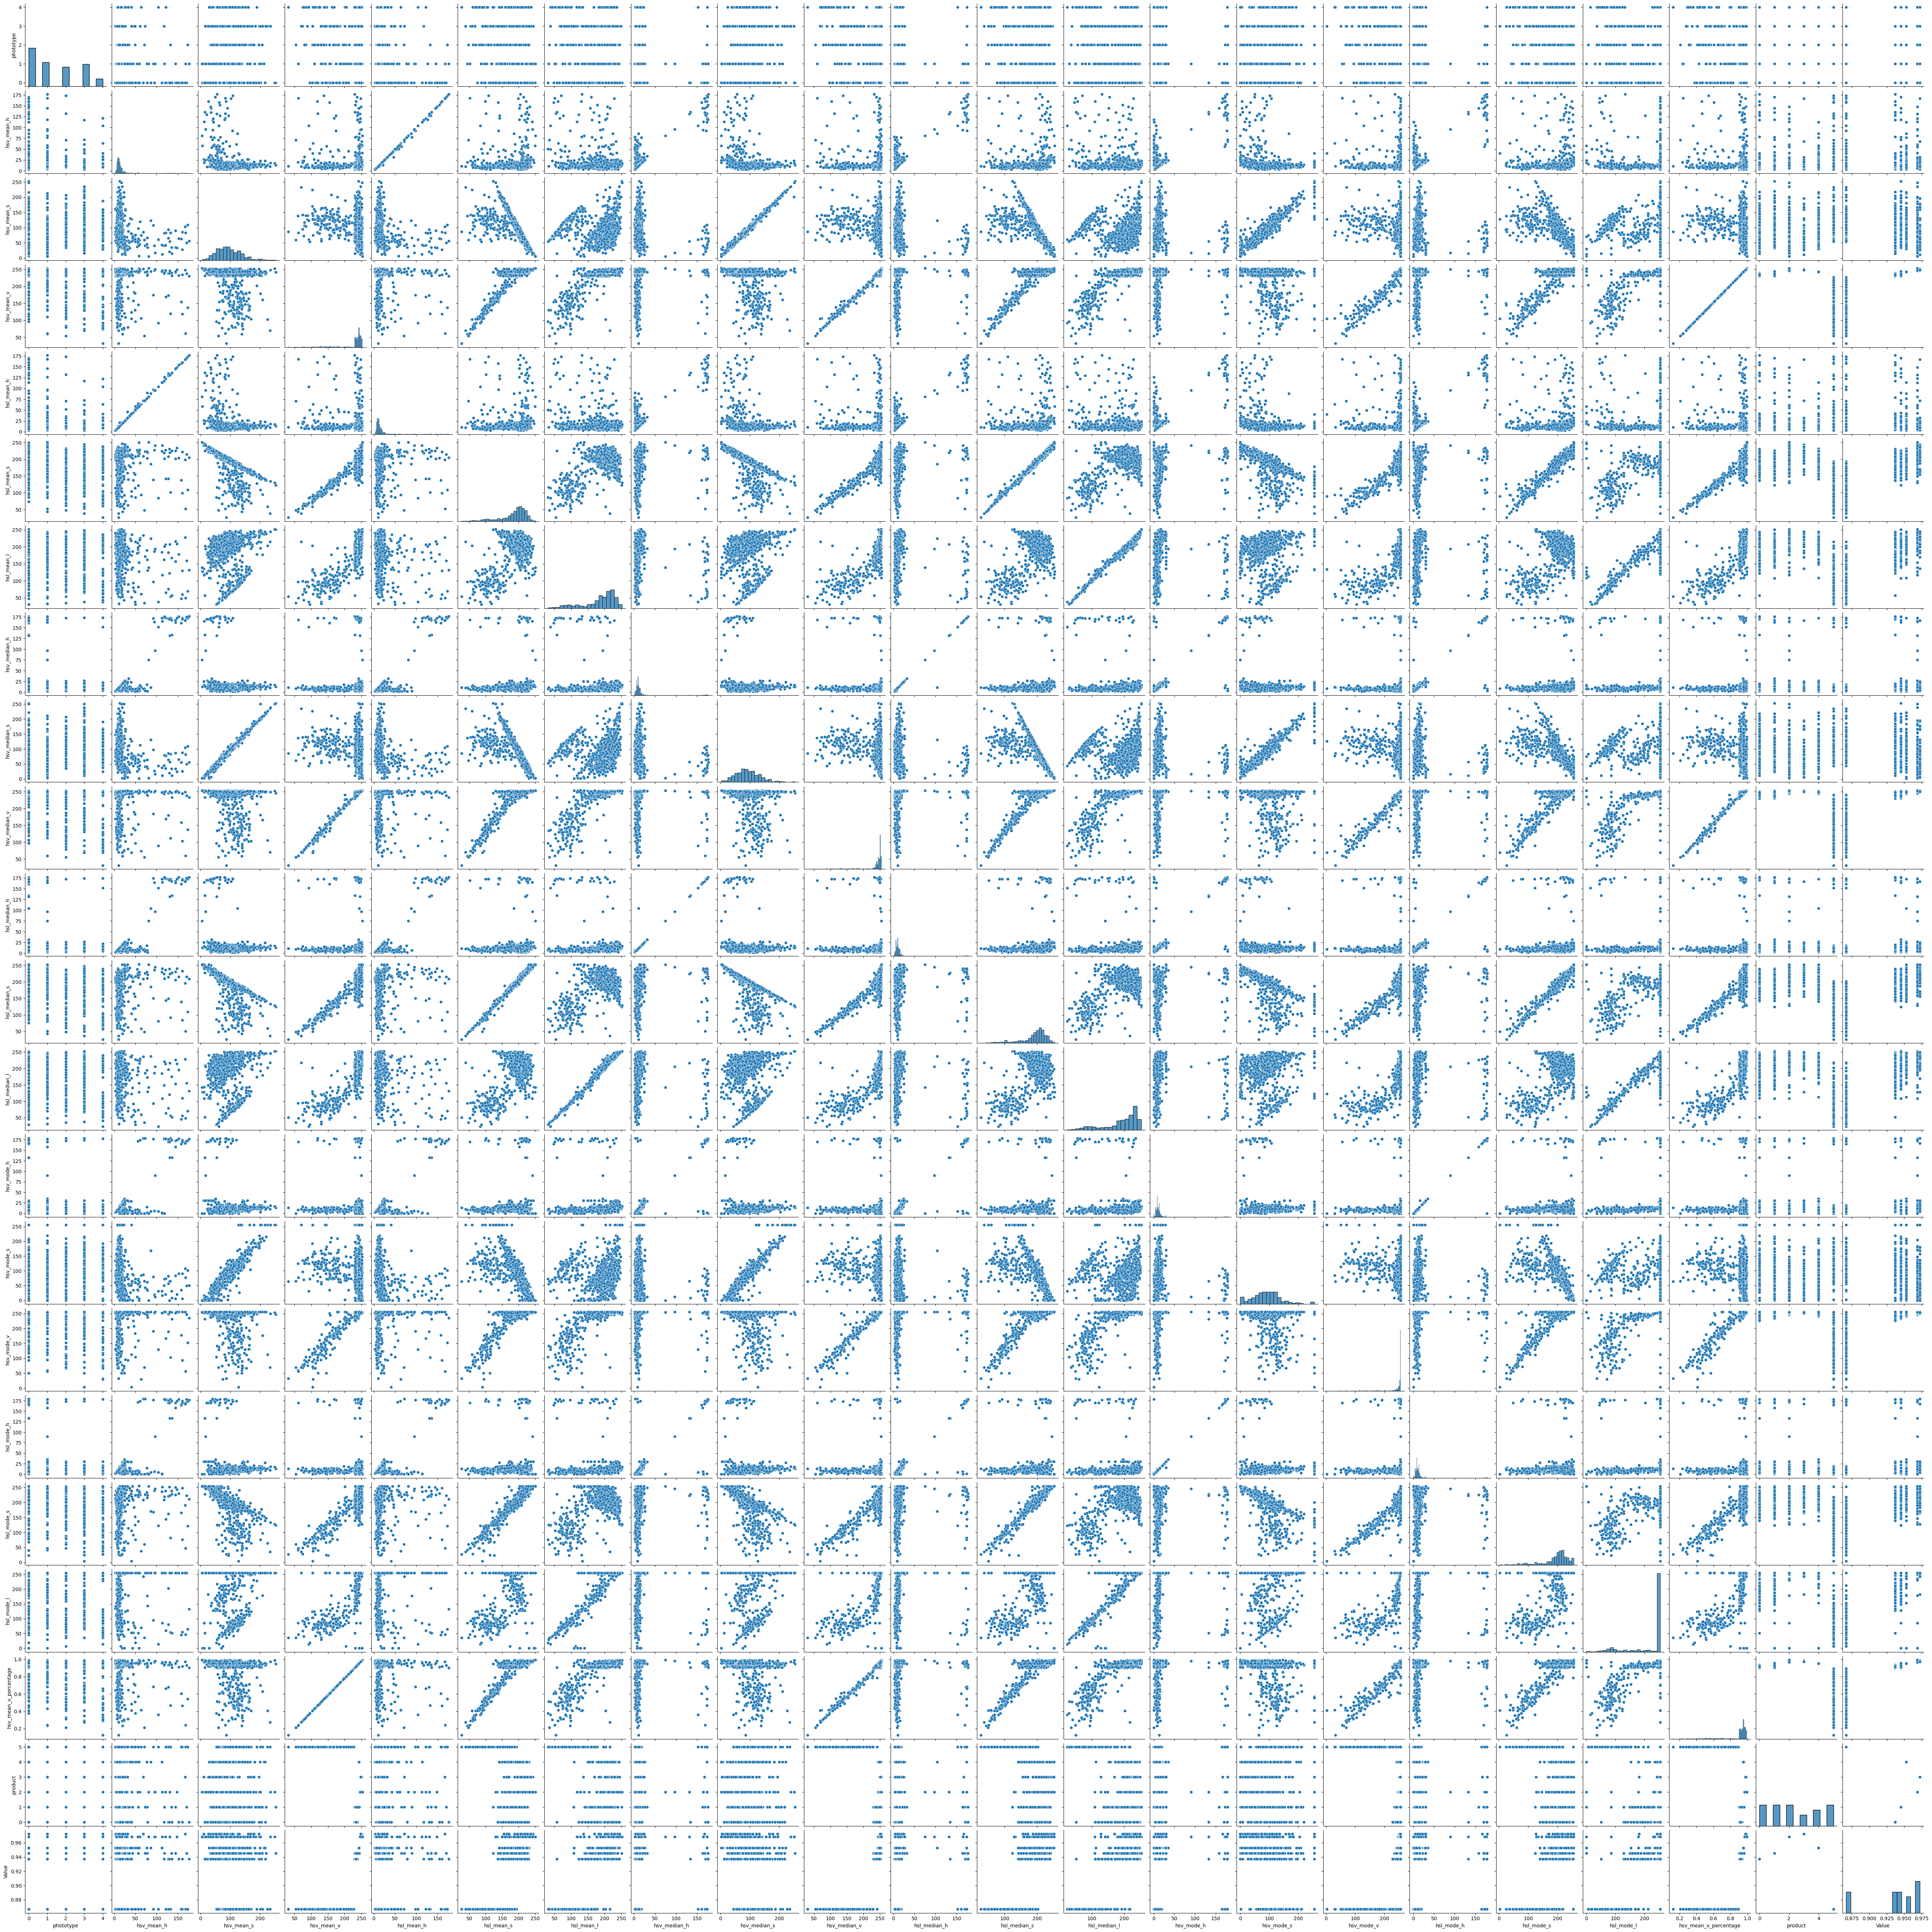

In [280]:
pair_img_fitzpatrick = sns.pairplot(df_image_fitzpatrick_new)


# K-Nearest Neighbors Fitzpatrick Skin Type

In [281]:
features_fitzpatrick = [
    "hsv_mean_v_percentage",
]
selected_fitzpatrick = df_image_fitzpatrick_new[features_fitzpatrick]

In [282]:
sc_fitzpatrick = StandardScaler()
sc_fitzpatrick.fit(selected_fitzpatrick)
X_fitzpatrick = pd.DataFrame(sc_fitzpatrick.transform(selected_fitzpatrick), columns=features_fitzpatrick)
X_fitzpatrick

hsv_mean_v_percentage
0                -4.043986
1                -1.022065
2                 0.077438
3                -2.612382
4                -2.037678
..                     ...
787               0.606229
788               0.601577
789               0.608518
790               0.451883
791               0.591358

[792 rows x 1 columns]

In [283]:
y_fitzpatrick_product = df_image_fitzpatrick_new["product"]
y_fitzpatrick_phototype = df_image_fitzpatrick_new["phototype"]

In [284]:
y_fitzpatrick_product

0        5
1        5
2        5
3        5
4        5
        ..
39527    3
39569    3
39737    3
39747    4
39875    3
Name: product, Length: 792, dtype: int64

In [285]:
y_fitzpatrick_phototype

0        1
1        3
2        1
3        0
4        3
        ..
39527    1
39569    1
39737    2
39747    2
39875    1
Name: phototype, Length: 792, dtype: int64

In [286]:
X_train_fitzpatrick_product, X_test_fitzpatrick_product, y_train_fitzpatrick_product, y_test_fitzpatrick_product = train_test_split(X_fitzpatrick, y_fitzpatrick_product, test_size=0.3, random_state=42)
X_train_fitzpatrick_phototype, X_test_fitzpatrick_phototype, y_train_fitzpatrick_phototype, y_test_fitzpatrick_phototype = train_test_split(X_fitzpatrick, y_fitzpatrick_phototype, test_size=0.3, random_state=42)

In [287]:
train_scores_fitzpatrick_product = np.array([])
test_scores_fitzpatrick_product = np.array([])

for i in range(1, 26):
    knn_product = KNeighborsClassifier(n_neighbors=i)
    knn_product.fit(X_train_fitzpatrick_product, y_train_fitzpatrick_product)

    train_scores_fitzpatrick_product = np.append(train_scores_fitzpatrick_product, knn_product.score(X_train_fitzpatrick_product, y_train_fitzpatrick_product))
    test_scores_fitzpatrick_product = np.append(test_scores_fitzpatrick_product, knn_product.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product))

In [288]:
train_scores_fitzpatrick_phototype = np.array([])
test_scores_fitzpatrick_phototype = np.array([])

for i in range(1, 26):
    knn_phototype = KNeighborsClassifier(n_neighbors=i)
    knn_phototype.fit(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype)

    train_scores_fitzpatrick_phototype = np.append(train_scores_fitzpatrick_phototype, knn_phototype.score(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype))
    test_scores_fitzpatrick_phototype = np.append(test_scores_fitzpatrick_phototype, knn_phototype.score(X_test_fitzpatrick_phototype, y_test_fitzpatrick_phototype))

In [289]:
max_train_score_fitzpatrick_product = np.max(train_scores_fitzpatrick_product)
train_scores_ind_fitzpatrick_product = np.where(train_scores_fitzpatrick_product == max_train_score_fitzpatrick_product)[0][0]
print(f"Max train score on Product Features {max_train_score_fitzpatrick_product*100:.2f}% at k = {train_scores_ind_fitzpatrick_product+1}")

Max train score on Product Features 100.00% at k = 1


In [290]:
print("All train scores on Product Features:")
for i, score in enumerate(train_scores_fitzpatrick_product):
    print(f"K = {i+1} :: {score*100:.2f}%")

All train scores on Product Features:
K = 1 :: 100.00%
K = 2 :: 99.28%
K = 3 :: 99.28%
K = 4 :: 99.10%
K = 5 :: 98.19%
K = 6 :: 98.01%
K = 7 :: 97.65%
K = 8 :: 98.74%
K = 9 :: 97.47%
K = 10 :: 98.38%
K = 11 :: 96.39%
K = 12 :: 96.75%
K = 13 :: 93.14%
K = 14 :: 92.96%
K = 15 :: 90.97%
K = 16 :: 91.52%
K = 17 :: 90.43%
K = 18 :: 90.61%
K = 19 :: 89.35%
K = 20 :: 90.25%
K = 21 :: 88.81%
K = 22 :: 89.53%
K = 23 :: 88.81%
K = 24 :: 88.63%
K = 25 :: 87.00%


In [291]:
max_train_score_fitzpatrick_phototype = np.max(train_scores_fitzpatrick_phototype)
train_scores_ind_fitzpatrick_phototype = np.where(train_scores_fitzpatrick_phototype == max_train_score_fitzpatrick_phototype)[0][0]
print(f"Max train score on Phototype Features {max_train_score_fitzpatrick_phototype*100:.2f}% at k = {train_scores_ind_fitzpatrick_phototype+1}")

Max train score on Phototype Features 100.00% at k = 1


In [292]:
print("All train scores on Photoype Features:")
for i, score in enumerate(train_scores_fitzpatrick_phototype):
    print(f"K = {i+1} :: {score*100:.2f}%")

All train scores on Photoype Features:
K = 1 :: 100.00%
K = 2 :: 59.75%
K = 3 :: 55.05%
K = 4 :: 53.25%
K = 5 :: 49.46%
K = 6 :: 47.65%
K = 7 :: 44.95%
K = 8 :: 42.96%
K = 9 :: 45.49%
K = 10 :: 43.68%
K = 11 :: 43.50%
K = 12 :: 43.50%
K = 13 :: 42.96%
K = 14 :: 41.34%
K = 15 :: 42.42%
K = 16 :: 40.97%
K = 17 :: 42.60%
K = 18 :: 40.97%
K = 19 :: 40.43%
K = 20 :: 40.79%
K = 21 :: 40.61%
K = 22 :: 41.16%
K = 23 :: 41.70%
K = 24 :: 41.16%
K = 25 :: 40.25%


In [293]:
max_test_score_fitzpatrick_product = np.max(test_scores_fitzpatrick_product)
test_scores_ind_fitzpatrick_product = np.where(test_scores_fitzpatrick_product == max_test_score_fitzpatrick_product)[0][0]
print(f"Max test score on Product Features {max_test_score_fitzpatrick_product*100:.2f}% at k = {test_scores_ind_fitzpatrick_product+1}")

Max test score on Product Features 98.32% at k = 2


In [294]:
print("All test scores on Product Features:")
for i, score in enumerate(test_scores_fitzpatrick_product):
    print(f"K = {i+1} :: {score*100:.2f}%")

All test scores on Product Features:
K = 1 :: 97.90%
K = 2 :: 98.32%
K = 3 :: 98.32%
K = 4 :: 97.90%
K = 5 :: 96.64%
K = 6 :: 97.48%
K = 7 :: 95.80%
K = 8 :: 96.22%
K = 9 :: 94.54%
K = 10 :: 94.96%
K = 11 :: 90.76%
K = 12 :: 92.44%
K = 13 :: 89.08%
K = 14 :: 91.18%
K = 15 :: 89.50%
K = 16 :: 90.34%
K = 17 :: 87.82%
K = 18 :: 88.24%
K = 19 :: 86.13%
K = 20 :: 86.55%
K = 21 :: 85.71%
K = 22 :: 86.13%
K = 23 :: 85.71%
K = 24 :: 85.29%
K = 25 :: 83.61%


In [295]:
max_test_score_fitzpatrick_phototype = np.max(test_scores_fitzpatrick_phototype)
test_scores_ind_fitzpatrick_phototype = np.where(test_scores_fitzpatrick_phototype == max_test_score_fitzpatrick_phototype)[0][0]
print(f"Max test score on Phototype Features {max_test_score_fitzpatrick_phototype*100:.2f}% at k = {test_scores_ind_fitzpatrick_phototype+1}")

Max test score on Phototype Features 30.25% at k = 5


In [296]:
print("All test scores on Photoype Features:")
for i, score in enumerate(test_scores_fitzpatrick_phototype):
    print(f"K = {i+1} :: {score*100:.2f}%")

All test scores on Photoype Features:
K = 1 :: 28.99%
K = 2 :: 26.89%
K = 3 :: 29.41%
K = 4 :: 29.41%
K = 5 :: 30.25%
K = 6 :: 30.25%
K = 7 :: 29.83%
K = 8 :: 28.15%
K = 9 :: 26.05%
K = 10 :: 24.79%
K = 11 :: 23.95%
K = 12 :: 24.37%
K = 13 :: 27.31%
K = 14 :: 26.05%
K = 15 :: 26.47%
K = 16 :: 26.89%
K = 17 :: 26.47%
K = 18 :: 27.73%
K = 19 :: 28.99%
K = 20 :: 27.73%
K = 21 :: 28.15%
K = 22 :: 26.89%
K = 23 :: 28.57%
K = 24 :: 28.57%
K = 25 :: 28.57%


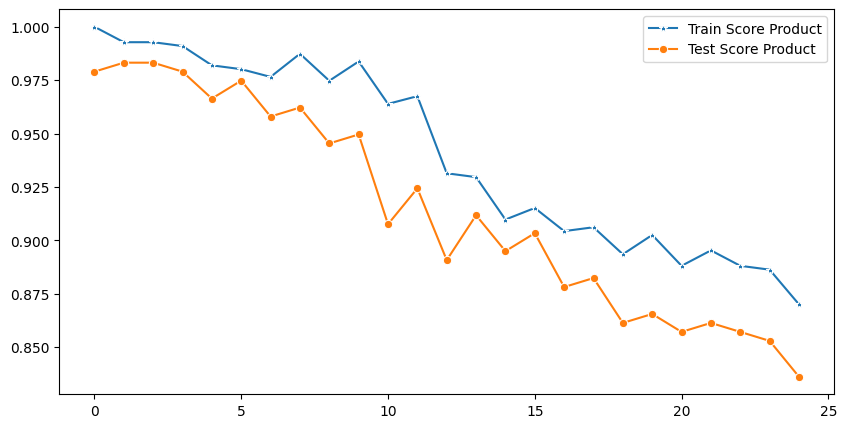

In [297]:
plt.figure(figsize=(10, 5))
line_fitzpatrick_product = sns.lineplot(train_scores_fitzpatrick_product, marker="*", label="Train Score Product")
line_fitzpatrick_product = sns.lineplot(test_scores_fitzpatrick_product, marker="o", label="Test Score Product")

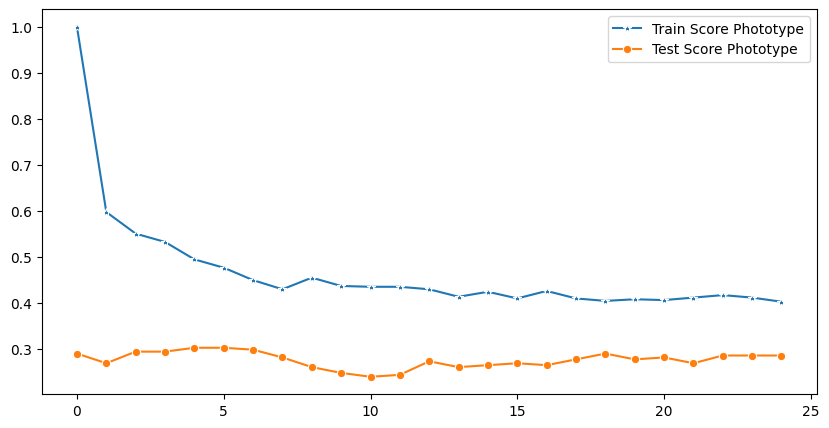

In [298]:
plt.figure(figsize=(10, 5))
line_fitzpatrick_phototype = sns.lineplot(train_scores_fitzpatrick_phototype, marker="*", label="Train Score Phototype")
line_fitzpatrick_phototype = sns.lineplot(test_scores_fitzpatrick_phototype, marker="o", label="Test Score Phototype")

In [319]:
knn_fitzpatrick_product = KNeighborsClassifier(n_neighbors=7)
knn_fitzpatrick_product.fit(X_train_fitzpatrick_product, y_train_fitzpatrick_product)
knn_fitzpatrick_product.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product)

0.957983193277311

In [320]:
knn_fitzpatrick_phototype = KNeighborsClassifier(n_neighbors=7)
knn_fitzpatrick_phototype.fit(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype)
knn_fitzpatrick_phototype.score(X_test_fitzpatrick_phototype, y_test_fitzpatrick_phototype)

0.29831932773109243

In [301]:
y_pred_fitzpatrick_product = knn_fitzpatrick_product.predict(X_test_fitzpatrick_product)
print(classification_report(y_test_fitzpatrick_product, y_pred_fitzpatrick_product))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.95      0.98      0.97        43
           2       1.00      0.98      0.99        47
           3       0.96      1.00      0.98        25
           4       0.97      1.00      0.98        31
           5       1.00      0.98      0.99        47

    accuracy                           0.98       238
   macro avg       0.98      0.99      0.98       238
weighted avg       0.98      0.98      0.98       238



In [339]:
unseen_data = np.array(0.9372549019607844)
test_unseen = knn_fitzpatrick_phototype.predict(unseen_data.reshape(1, -1))
# print the result using the label product
print(f"Predicted Product: {le_fitzpatrick.inverse_transform(test_unseen)[0]}")

Predicted Product: I & II


/Users/avv210/Documents/IT/GitHub/fores/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [302]:
y_pred_fitzpatrick_phototype = knn_fitzpatrick_phototype.predict(X_test_fitzpatrick_phototype)
print(classification_report(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype))

              precision    recall  f1-score   support

           0       0.34      0.53      0.42        83
           1       0.15      0.12      0.13        50
           2       0.11      0.05      0.07        43
           3       0.23      0.20      0.21        46
           4       0.29      0.25      0.27        16

    accuracy                           0.27       238
   macro avg       0.23      0.23      0.22       238
weighted avg       0.24      0.27      0.24       238



In [303]:
knn_cv_fitzpatrick_product = KNeighborsClassifier(n_neighbors=3)
cv_scores_fitzpatrick_product = cross_val_score(knn_cv_fitzpatrick_product, X_fitzpatrick, y_fitzpatrick_product, cv=25)
print("Cross Validation Score on Product")
print(cv_scores_fitzpatrick_product)

Cross Validation Score on Product
[0.96875    1.         1.         0.96875    1.         0.96875
 1.         1.         1.         1.         1.         1.
 0.96875    1.         1.         1.         1.         1.
 0.96774194 0.93548387 0.96774194 1.         0.96774194 0.96774194
 0.96774194]


In [304]:
rskf_fitzpatrick_product = RepeatedStratifiedKFold(n_splits=25, n_repeats=10, random_state=42)
rskf_fitzpatrick_product.get_n_splits(X_fitzpatrick, y_fitzpatrick_product)

250

In [305]:
knn_cv_fitzpatrick_phototype = KNeighborsClassifier(n_neighbors=13)
cv_scores_fitzpatrick_phototype = cross_val_score(knn_cv_fitzpatrick_phototype, X_fitzpatrick, y_fitzpatrick_phototype, cv=25)
print("Cross Validation Score on Phototype")
print(cv_scores_fitzpatrick_phototype)

Cross Validation Score on Phototype
[0.15625    0.21875    0.15625    0.15625    0.25       0.4375
 0.3125     0.28125    0.34375    0.3125     0.34375    0.15625
 0.3125     0.3125     0.375      0.28125    0.3125     0.32258065
 0.41935484 0.35483871 0.29032258 0.22580645 0.35483871 0.32258065
 0.19354839]


In [306]:
rskf_fitzpatrick_phototype = RepeatedStratifiedKFold(n_splits=25, n_repeats=10, random_state=42)
rskf_fitzpatrick_phototype.get_n_splits(X_fitzpatrick, y_fitzpatrick_phototype)

250

In [307]:
y_pred_fitzpatrick_product = knn_fitzpatrick_product.predict(X_test_fitzpatrick_product)
confusion_matrix(y_test_fitzpatrick_product, y_pred_fitzpatrick_product)
pd.crosstab(y_test_fitzpatrick_product, y_pred_fitzpatrick_product, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted   0   1   2   3   4   5  All
True                                  
0          44   1   0   0   0   0   45
1           0  42   0   0   1   0   43
2           0   0  46   1   0   0   47
3           0   0   0  25   0   0   25
4           0   0   0   0  31   0   31
5           0   1   0   0   0  46   47
All        44  44  46  26  32  46  238

In [308]:
y_pred_fitzpatrick_phototype = knn_fitzpatrick_phototype.predict(X_test_fitzpatrick_phototype)
confusion_matrix(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype)
pd.crosstab(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted    0   1   2   3   4  All
True                               
0           44  17   7  13   2   83
1           32   6   5   5   2   50
2           22   6   2   8   5   43
3           26   7   3   9   1   46
4            4   3   1   4   4   16
All        128  39  18  39  14  238

In [309]:
param_grid_fitzpatrick_product = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_product = KNeighborsClassifier()
knn_gridcv_fitzpatrick_product = GridSearchCV(knn_fitzpatrick_product, param_grid_fitzpatrick_product, cv=rskf_fitzpatrick_product)
knn_gridcv_fitzpatrick_product.fit(X_fitzpatrick, y_fitzpatrick_product)

print(f"Best score Product Features: {knn_gridcv_fitzpatrick_product.best_score_}")
print(f"Best parameters Product Features: {knn_gridcv_fitzpatrick_product.best_params_}")

Best score Product Features: 0.985983870967742
Best parameters Product Features: {'n_neighbors': 1}


In [310]:
param_grid_fitzpatrick_phototype = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_phototype = KNeighborsClassifier()
knn_gridcv_fitzpatrick_phototype = GridSearchCV(knn_fitzpatrick_phototype, param_grid_fitzpatrick_phototype, cv=rskf_fitzpatrick_phototype)
knn_gridcv_fitzpatrick_phototype.fit(X_fitzpatrick, y_fitzpatrick_phototype)

print(f"Best score Phototype Features: {knn_gridcv_fitzpatrick_phototype.best_score_}")
print(f"Best parameters Phototype Features: {knn_gridcv_fitzpatrick_phototype.best_params_}")

Best score Phototype Features: 0.3141532258064516
Best parameters Phototype Features: {'n_neighbors': 25}


#### Save the Model to Pickle

In [315]:
pd.to_pickle(knn_fitzpatrick_product, "models/knn_fitzpatrick_vmean_product.pkl")
pd.to_pickle(knn_fitzpatrick_phototype, "models/knn_fitzpatrick_vmean_phototype.pkl")